# 6.2 Algoritmes de classificació: SVM, Arbres de decisió, Haar

## SVM
SVM (de l'anglès *Support Vector Machine*) és un algoritme d'aprenentatge supervisat utilitzat per classificar i per fer regressió de dades.

És un classificador discriminatori definit formalment per un hiperplà o un conjunt d'hiperplans en un espai infinit o en un espai amb un alt nombre de dimensions. Donades unes dades etiquetades d'aprenentatge (aprenentatge supervisat), l'algoritme crea l'hiperplà òptim que categoritza els nous exemples. Aquest hiperplà tindrà la distància més gran possible als punts de dades d'entrenament més propers de qualsevol altra classe.

<table>
    <tr><td width=300><img src='Imatges/220px-Svm_separating_hyperplanes_(SVG).svg.png' width=300></td></tr>
    <tr><td width=300 ><ul><li>H1 no separa les classes.</li><li>H2 les separa però amb un marge mínim a un costat. </li><li>H3 les separa amb distància màxima a totes dues classes.</li></ul></td></tr>
    <tr><td align=center><i>(Font imatge: <a href="https://en.wikipedia.org/wiki/Support-vector_machine">Wikipedia</a>)</i></td></tr>
</table>

Tingueu en compte que si parlem de 2 dimensions, podríem separar dues categories amb una línia, però si parlem de més dimensions necessitem separar les categories per hiperplans.

El model SVM representa les dades o mostres com a punts a l’espai, i els mapeja de tal manera que veiem les categories clarament dividides i espaiades; Les diferents categories estan separades per un buit clar en l'espai mostral (aquest espai s'anomena *marge*), el SVM intenta maximitzar aquest buit (marge), fent-lo el més ampli possible. 

L'algoritme de SVM pot realitzar tant una classificació lineal com una de no-lineal, mapejant les dades en espais de característiques de grans dimensions. I, a més a més, un cop tenim el model muntat amb les dades d'aprenentatge, també pot predir nous valors (decidir a quina de les categories creades pertany un nou valor).

**Avantatges** del SVM:
- Exactitud (accuracy)
- Funciona molt bé amb bases de dades limitades.
- El Kernel conté una funció de transformació no-lineal per convertir dades no-lineals complexes però separables, en dades separables i lineals.

**Desavantatges** del SVM:
- No funciona gaire bé amb bases de dades molt grans.
- A vegades el temps d'entrenament/aprenentatge pot ser massa alt.



### Paràmetres del SVM
No entrarem a analitzar les fórmules matemàtiques que s'apliquen en l'algoritme SVM (si hi esteu interessats, teniu referències al final d'aquest capítol), però sí que és interessant destacar que l'algoritme necessita ser configurat amb 3 paràmetres principals: kernel, paràmetre de regularització i, gamma. Segons com els configurem, l'algoritme detectarà millor unes topologies que unes altres. Anem a veure una mica en detall aquests paràmetres (us recomanem  llegir aquest article de [Medium](https://medium.com/machine-learning-101/chapter-2-svm-support-vector-machine-theory-f0812effc72) sobre el SVM i els paràmetres de l'algoritme en detall).

#### 1. Kernel: 
Hi ha tipologies de dades que es poden separar linealment en un pla bidimensional (Figura 1: Problema Lineal), però hi ha d'altres que no (Figura 2: Problema No Lineal). 

<table>
    <tr>
        <td style="border:1px solid black" width=350><img src="Imatges/svm_kernel_lineal.png"></td>
        <td style="border:1px solid black" width=350><img src="Imatges/svm_kernel_no_lineal.png"></td>
    </tr>
    <tr>
        <td style="border:1px solid black" align=center width=350>Figura 1: Problema Lineal</td>
        <td style="border:1px solid black" align=center width=350>Figura 2: Problema No Lineal</td>
    </tr>
</table>
    
En aquests casos el SVM transforma el pla original en un altre espai estès (espai de característiques) on sí pot resoldre el problema linealment i, un cop aconseguit, torna a fer mapping a l'espai original per mostrar i donar els resultats finals. Normalment no necessitem conèixer el mapping, però sí la funció nucli o kernel associada (veure Figura 3).

<table>
    <tr>
        <td style="border:1px solid black" width=500><img src="Imatges/svm_kernel_associat.png"></td>
    </tr>
    <tr>
        <td style="border:1px solid black" align=center width=500>Figura 3: Kernel associat que permet trobar l'hiperplà òptim. Font: <a href="https://gtas.unican.es/files/docencia/APS/apuntes/07_svm_kernel.pdf">Métodos kernel para clasificación; S. Van Vaerenbergh, I. Santamaría</a></td>
    </tr>
 </table>


Les funcions Kernel poden ser linears, polinomials, rbf (gaussianes), i sigmoidees entre d'altres. Fins i tot podem crear el nostre propi kernel.


#### 2. Paràmetre de regularització o paràmetre *C*: 
El paràmetre de regularització C estableix un compromís entre l'error d'entrenament i la complexitat del model:
  - Valors baixos de C: ens creen un model senzill, amb major error en l'entrenament,  i més suavitat en la frontera de decisió.
  - Valors alts de C: ens creen un model complex, amb poca suavitat en la frontera de decisió i amb major risc de sobre-ajustament o overfitting.

<table>
    <tr>
        <td style="border:1px solid black" width=500><img src="Imatges/svm_diff_C.png"></td>
    </tr>
    <tr>
        <td style="border:1px solid black" align=center width=500>Figura 4: Diferents nivells del paràmetre C afecten a la complexitat del model i la frontera de decisió. Font: <a href="https://gtas.unican.es/files/docencia/APS/apuntes/07_svm_kernel.pdf">Métodos kernel para clasificación; S. Van Vaerenbergh, I. Santamaría</a>
        </td>
    </tr>
</table>

Un valor molt elevat de C bàsicament li està dient al model que no tenim molta fe en la distribució de les mostres d'aprenentatge i que, per tant, ha de considerar només les mostres més properes a la línia de separació, a la frontera. En l'altre extrem, en canvi, un valor molt baix de C li diu al model el contrari: que volem que faci servir totes les mostres d'aprenentatge per calcular els marges i fronteres.
    
Busquem un valor de C que trobi l'equilibri entre aconseguir una frontera suau i classificar el màxim de mostres correctament.
    
#### 3. Gamma:
Amb el paràmetre gamma ens passa una cosa similar al paràmetre C, el seu valor pot fer varia la complexitat de la frontera. Però en aquest cas, la gamma defineix fins a quin punt una sola mostra pot influir en el resultat final dels marges i fronteres:
- Valors baixos de gamma indiquen que una sola mostra té un abast o radi d'influència molt llunyà.
- Valors alts de gamma indiquen que una sola mostra només pot influir a distàncies molt curtes.

<table>
    <tr>
        <td style="border:1px solid black" width=400>
            <img src="Imatges/svm_low_gamma.png">
        </td>
        <td style="border:1px solid black" width=400>
            <img src="Imatges/svm_high_gamma.png">
        </td>           
    </tr>
    <tr>
        <td colspan=2 style="border:1px solid black" align=center width=500>Figura 5: Influència del valor de gamma en els marges i frontera final. Font: <a href="https://medium.com/machine-learning-101/chapter-2-svm-support-vector-machine-theory-f0812effc72">Medium</a>
        </td>
    </tr>
</table>
    
Si el valor de gamma és massa alt, la decisió de la frontera només tindrà en compte les mostres (punts) que estan molt a prop a la línia, fent que el model ignori les mostres que queden lluny de la frontera. Per altra banda, si el valor de gamma és suficientment baix, les mostres més llunyanes a la frontera també es tindran en compte i obtindrem una corba més lineal.

<table>
    <tr>
        <td style="border:1px solid black" width=500><img src="Imatges/svm_diff_gamma.png"></td>
    </tr>
    <tr>
        <td style="border:1px solid black" align=center width=500>Figura 6: Diferents nivells del paràmetre gamma afecten a la complexitat del model i la frontera de decisió. Valors elevats poden crear overfitting. Font: <a href="https://gtas.unican.es/files/docencia/APS/apuntes/07_svm_kernel.pdf">Métodos kernel para clasificación; S. Van Vaerenbergh, I. Santamaría</a>
        </td>
    </tr>
 </table>

Anem a fer un exemple pràctic per comprovar les diferències en els resultats segons la configuració que fem d'aquests paràmetres. Tornarem a utilitzar l'exemple IRIS utilitzat en capítols anteriors, però aquest cop fent servir l'algoritme de classificació SVM amb diferents nivells de configuració per veure com afecta als resultats. Us animem a jugar una mica amb els paràmetres C i gamma per veure com varien els resultats.



SVC with linear kernel: accuracy 0.82
LinearSVC (linear kernel): accuracy 0.8
SVC with RBF kernel: accuracy 0.8266666666666667
SVC with polynomial (degree 3) kernel: accuracy 0.8133333333333334


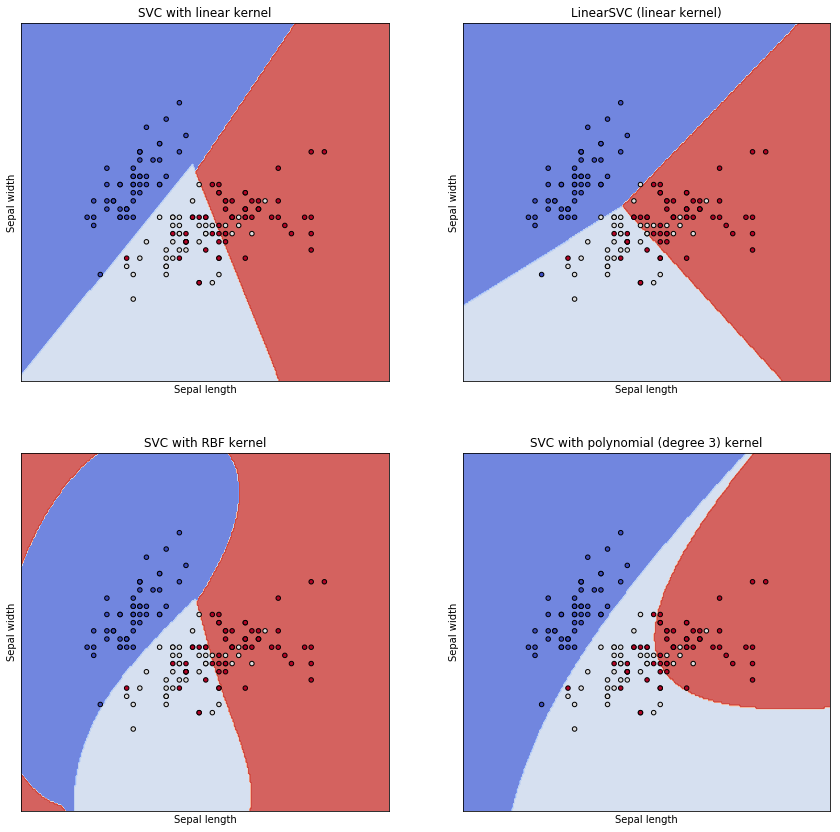

In [34]:
# EXEMPLE PRÀCTIC: SVM
# Font: https://scikit-learn.org/stable/auto_examples/svm/plot_iris_svc.html#sphx-glr-auto-examples-svm-plot-iris-svc-py
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets


def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out


# import some data to play with
iris = datasets.load_iris()
# Per facilitat, treballem només amb les 2 primeres dimensions del dataset. Podríem fer servir PCA per a reduir la dimensionalitat també
X = iris.data[:, :2]
y = iris.target

# Creem diversos models SVM canviant el Kernel
#  - Kernel lineal
#  - Kernel lineal (fent servir una aproximació matemàtica diferent)
#  - Kernel RBF: Kernel gaussià
#  - Kernel Polinomial
C = 1.0  # SVM regularization parameter
models = (svm.SVC(kernel='linear', C=C),
          svm.LinearSVC(C=C, max_iter=10000),
          svm.SVC(kernel='rbf', gamma=0.7, C=C),
          svm.SVC(kernel='poly', degree=3, gamma='auto', C=C))
# Aproximem els models
models = list(clf.fit(X, y) for clf in models)

# Mostrem els resultats
titles = ('SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel')

# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.2, hspace=0.2)

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Sepal length')
    ax.set_ylabel('Sepal width')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

fig = plt.gcf()
fig.set_size_inches(14.5, 14.5)

for m, t in zip(models, titles):
    y_predict = m.predict(iris.data[:, :2])
    accuracy = accuracy_score(y, y_predict)
    print('{}: accuracy {}'.format(t, accuracy))



## Arbres de Decisió
L'algoritme d'Arbres de Decisió és un mètode d'aprenentatge no supervisat i no paramètric que s'utilitza tant per problemes de classificació, com per problemes de regressió.

L'objectiu principal és crear un model que pugui predir el valor o la categoria d'una mostra a través de senzilles normes de decisió que s'extreuen de les característiques de les dades d'aprenentatge.

Un arbre de decisió és una estructura d'arbre binari tipus flowchart, on els nodes interns representen característiques o atributs, les branques representen regles de decisió, i cada node fulla representa la sortida que pot ser una categoria (si fem classificació) o un valor (si fem regressió). El node del nivell més superior es coneix com node arrel. L'estructura tipus flowchart permet una visualització molt gràfica i entenedora ja que s'assembla molt al nivell humà de pensament. Aquesta és la raó principal de per què l'algoritme d'arbres de decisió és un dels més fàcils d'entendre.

<table>
    <tr>
        <td style="border:1px solid black" width=500><img src="Imatges/decision_tree.png"></td>
    </tr>
    <tr>
        <td style="border:1px solid black" align=center width=500>
            Arbres de decisió <br><br>
            <i>Font: <a href="https://www.datacamp.com/community/tutorials/decision-tree-classification-python">Datacamp</a></i>
        </td>
    </tr>
</table>

Per a cada iteració, el sistema intentar buscar el millor atribut que divideixi les mostres en dues classes diferenciades (recordeu que són arbres *binaris*). Quan es troba, es crea un node de decisió amb l'atribut i es divideixen les mostres en dos subconjunts (nodes) fills. El procés es repeteix fins que es compleixi un dels següent requisits:
- Totes les mostres restants tenen el mateix valor d'atribut.
- No hi ha més atributs restants.
- No hi ha més mostres.

Principals **avantatges** de l'algoritme d'Arbres de decisió:
- Són senzills d'entendre i d'interpretar: els arbres es poden visualitzar.
- Necessita poca preparació de les dades (no cal normalització per exemple).
- Pot tractar dades numèriques i categòriques.
- Permet múltiples sortides.

Principals **desavantatges** de l'algoritme d'Arbres de decisió:
- Si els arbres de decisió creats són excessivament complexes com per no crear generalitzacions de les dades, estarem creant overfitting. Una manera d'evitar-ho és forçant un mínim nombre de mostres en les fulles, o bé un màxim nivell de profunditat.
- Els arbres de decisió poden ser inestables perquè petites variacions en les dades poden crear un arbre totalment diferent.
- Si les dades d'entrada no estan equilibrades es poden crear arbres esbiaixats si una o diverses classes són predominants.




In [24]:
# EXEMPLE PRÀCTIC: ARBRE DE DECISIÓ

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# carreguem dades
iris = load_iris()
# dividim entre conjunt d'aprenentatge i de test
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=1)

print("Mostres totals {}, aprenentatge {}, test {}".format(iris.data.shape[0], X_train.shape[0], X_test.shape[0]))

# creem un classificador
clf = DecisionTreeClassifier(random_state=0)
# l'entrenem amb les dades d'aprenentatge
model = clf.fit(X_train, y=y_train)

# predim les dades de test
y_predict = model.predict(X_test)

print("Precisió {}%".format(100 * accuracy_score(y_test, y_predict)))

print("Matriu de confusió \n",  confusion_matrix(y_test, y_predict))


Mostres totals 150, aprenentatge 112, test 38
Precisió 97.36842105263158%
Matriu de confusió 
 [[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]


## Classificador en cascada de Haar

Quan processem una imatge amb finestres lliscants, sovint trobem un nombre molt elevat de finestres candidates a obtenir l'objecte que busquem. Hi ha diverses maneres de descartar les finestres que no ens interessen, però una manera molt ràpida i eficient és utilitzant una cascada de classificadors.

La cascada de classificadors combina diversos classificadors seqüencialment. Cada classificador de la cascada es fixa en unes característiques concretes. La finestra idònia, és a dir, aquella que té l'objecte que busquem, haurà de superar cadascun dels classificadors de la cascada. Dit d'una altra manera, si una classificador rebutja una imatge, aquesta imatge queda desclassificada. D'aquesta manera la finestra idònia haurà d'haver superat tots i cadascun dels classificadors, el que vol dir que complirà tots i cadascuns dels requeriments o característiques que busca la cascada completa.

<table>
    <tr>
        <td style="border:1px solid black" width=500><img src="Imatges/cascade_process.png"></td>
    </tr>
    <tr>
        <td style="border:1px solid black" align=justify width=500>
            <b>Classificació en cascada</b>: Només aquelles finestres que superin tots i cadascun dels classificadors, contindran l'objecte buscat. <br><br>
            <i>Font: <a href="https://www.semanticscholar.org/paper/Thermal-image-human-detection-using-Haar-cascade-Setjo-Achmad/4eb0a7255ebc8649d4ae5f6497e35a9efb0a7770">"Thermal image human detection using Haar-cascade classifier", de Christian Herdianto Setjo, Balza Achmad, Faridah</a></i>
        </td>
    </tr>
</table>

Normalment, els classificadors utilitzats en un classificador en cascada són classificadors dèbils, la gràcia està en què al combinar-los es crea un classificador fort amb la precisió desitjada. Cal tenir en compte, però, que és necessari realitzar un procés previ d'entrenament supervisat per crear la cascada de classificadors.

Fent un exemple metafòric, si busquéssim detectar arbres potser buscaríem objectes que tinguessin tronc i branques d'algun to marró, que aquesta part marró estigués en la part inferior de l'objecte, que tingués fulles d'algun to verd, pot ser amb alguna flor o algun fruit d'algun altre color, etc. Si enlloc de buscar totes aquestes característiques a la vegada, anéssim descartant aquelles imatges o finestres que no tenen alguna de les característiques acabaríem abans. Per exemple: si no té res de color marró ho descartem, si no té cap part allargada i marró en la part inferior ho descartem, si no té branques ho descartem, etc. D'aquesta manera podem evitar molt esforç de càlcul perquè en cada nivell de la cascada anem descartant finestres que no complirien tots els requeriments. 

Les principals **avantatges** d'aquest mètode són les següents:
- El nombre d'imatges a processar es va reduint a mesura que avancem en la cascada. 
- El nombre de característiques que s'utilitzen en els primers classificadors acostuma a ser molt baix, tot i que descarten un nombre molt elevat de imatges no idònies.
- El percentatge de falsos positius i falsos negatius va disminuint en cada nivell de la cascada, mentre que el percentatge de positius es manté a un nivell molt elevat, proper al 95-99%

Mentre que el principal **desavantatge** és que necessita centenars de mostres per l'entrenament.

OpenCV implementa el classificador en cascada basat en Haar-like features que van implementar Paul Viola i Michael Jones en el seu article ["Rapid Object Detection using a Boosted Cascade of Simple Features"](https://www.researchgate.net/profile/Michael_Jones20/publication/3940582_Rapid_Object_Detection_using_a_Boosted_Cascade_of_Simple_Features/links/0f31753b419c639337000000/Rapid-Object-Detection-using-a-Boosted-Cascade-of-Simple-Features.pdf) en el 2001. Aquest algoritme (conegut com l'algoritme de Viola-Jones) es pot entrenar a partir de centenars d'imatges positives i negatives per detectar tota mena d'objectes, però en l'article citat es centraven en la detecció de cares i, de fet, la majoria de vegades que s'utilitza aquest algoritme és amb aquest objectiu.

L'algoritme de Viola-Jones constava de 4 passos:
1. Selecció dels Haar-like features
2. Creació de una imatge integral
3. Entrenament de la cascada dels classificadors amb AdaBost
4. Creació de la Cascada de Classificadors.

No entrarem en els detalls del procés (podeu llegir l'[article](https://www.researchgate.net/profile/Michael_Jones20/publication/3940582_Rapid_Object_Detection_using_a_Boosted_Cascade_of_Simple_Features/links/0f31753b419c639337000000/Rapid-Object-Detection-using-a-Boosted-Cascade-of-Simple-Features.pdf) i els tutorials que hi ha a l'apartat de Referències si hi esteu interessats), més que res perquè l'OpenCV ja fa el procés de manera automàtica, però sí que volem que entengueu en què es basa l'algoritme i, sobretot, què són aquests "Haar" que dóna nom al mètode.

Per aplicar el mètode en cascada de Haar a la detecció de cares, es fan servir un conjunt de kernels convolucionats on cadascun d'ells detecta un característica bàsica i diferent; per exemple que la zona dels ulls és més fosca que el pont del nas, que les galtes normalment són més brillants que els ulls, etc. Aquestes característiques ens poden ajudar a decidir si estem veien o no una cara. I aquests kernels s'anomenen, en anglès, **Haar-like features** (característiques estil Haar). A continuació mostrem alguns exemples d'aquests kernels i la seva aplicació per extreure/detectar característiques de les cares:

<table>
    <tr>
        <td style="border:1px solid black" width=400>
            <img src="Imatges/haar_like_features.png">
        </td>
        <td style="border:1px solid black" width=400>
            <img src="Imatges/haar_in_face.png">
        </td>
    </tr>
    <tr>
        <td style="border:1px solid black" width=400 align=center>Haar-like features.</td>
        <td style="border:1px solid black" width=400 align=center>Sobeposició de Haar-like features en imatges de cares per calcular les característiques. 
        </td>
    </tr>
    <tr>
        <td colspan=2 align=center style="border:1px solid black">
            <i>Font: <a href="https://towardsdatascience.com/face-detection-for-beginners-e58e8f21aad9">Towards Data Science</a></i>
        </td>
    </tr>
</table>


Donada una imatge, l'algoritme comprova tantes petites subregions/finestres com pugui i intenta trobar una cara en cada finestra buscant característiques específiques en cada subregió. Llavors, per a cada subregió o finestra, es busquen cares aplicant els Haar-like features en totes les posicions i escalats possibles; es necessita comprovar diferents posicions i escalats perquè la imatge pot contenir diverses cares i diferents mides.

L'aplicació d'un Haar-like feature vol dir sobreposar el kernel convulionats corresponent sobre la imatge i calcular el seu valor. El valor de la característica consistirà en restar a la suma de tots els píxels sota la zona negra, la suma de tots els píxels sota la zona blanca. D'aquesta manera el càlcul de cada característica és molt ràpid i molt poc costós a  nivell computacional.

Finalment, comentar-vos que el classificador en Cascada de Haar pel reconeixement de cares s'entrena utilitzant centenars de mostres, tan positives (cares) com negatives (no cares), perquè el classificador pugui reconèixer la forma de l'objecte que busca. Diuen que per un òptim entrenament s'han de fer servir al voltant de 3000 imatges (entre positives i negatives).

I, ara ja sí, anem a veure un exemple pràctic d'aquest algoritme en OpenCV.




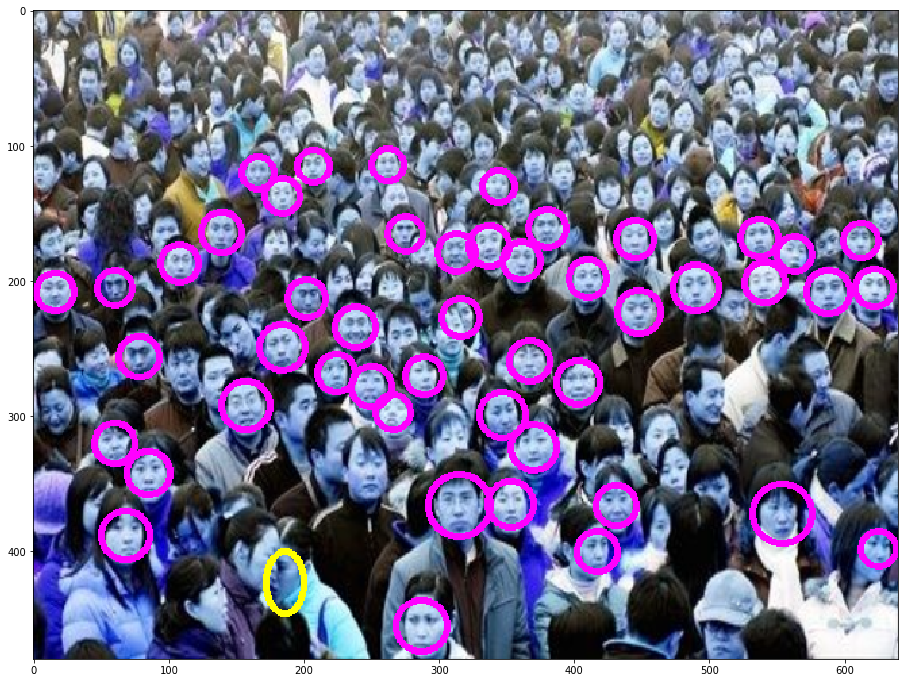

In [26]:
# EXEMPLE PRÀCTIC: CLASSIFICACIÓ EN CASCADA DE HAAR PER DETECCIÓ DE CARES
import cv2
import matplotlib.pyplot as plt

def trobar_objectes(im, cascade):
    im_gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
    im_gray = cv2.equalizeHist(im_gray)
    #-- Detectem objectes
    deteccions = cascade.detectMultiScale(im)
    return deteccions

def dibuixar_deteccions(im, deteccions, color):
    # Cada detecció té la cantonada superior esquerra i les seves dimensions
    for (x,y,w,h) in deteccions:
        center = (x + w//2, y + h//2)
        im = cv2.ellipse(im, center, (w//2, h//2), 0, 0, 360, color, 4)
    return im
    

img = cv2.imread('Imatges/face_detection.jpeg')
img = cv2.resize(img, (640, 480), cv2.INTER_CUBIC)

face_cascade = cv2.CascadeClassifier()
face_cascade.load("Data/haarcascade_frontalface_default.xml")
profile_cascade = cv2.CascadeClassifier()
profile_cascade.load("Data/lbpcascade_profileface.xml")

cares_frontals = trobar_objectes(img, face_cascade)
cares_perfil_dret = trobar_objectes(img, profile_cascade)

img_cares = dibuixar_deteccions(img, cares_frontals, (255, 0, 255))
img_cares = dibuixar_deteccions(img, cares_perfil_dret, (255, 255, 0 ))

plt.imshow(img_cares)

fig = plt.gcf()
fig.set_size_inches(15.5, 15.5)


## Referències
**SVM:**
- Els paràmetres de l'algoritme en detall: *Chapter 2 : SVM (Support Vector Machine) — Theory, de Savan Patel*: [https://medium.com/machine-learning-101/chapter-2-svm-support-vector-machine-theory-f0812effc72](https://medium.com/machine-learning-101/chapter-2-svm-support-vector-machine-theory-f0812effc72)
- L'algoritme més en profunditat amb exemples de codi Python: SciKit-Learn - Support Vector Machines: [https://scikit-learn.org/stable/modules/svm.html](https://scikit-learn.org/stable/modules/svm.html)
- Métodos kernel para clasificación; S. Van Vaerenbergh, I. Santamaría: [https://gtas.unican.es/files/docencia/APS/apuntes/07_svm_kernel.pdf](https://gtas.unican.es/files/docencia/APS/apuntes/07_svm_kernel.pdf)
- OpenCV - Introduction to SVM: [https://docs.opencv.org/3.4/d1/d73/tutorial_introduction_to_svm.html](https://docs.opencv.org/3.4/d1/d73/tutorial_introduction_to_svm.html)
- SVM a nivell matemàtic: An Idiot’s guide to Support vector machines (SVMs). R. Berwick, Village Idiot: [http://web.mit.edu/6.034/wwwbob/svm-notes-long-08.pdf](http://web.mit.edu/6.034/wwwbob/svm-notes-long-08.pdf)

**Arbres de decisió:**
- Decision Tree classification in Python, de Avinash Navlani: [https://www.datacamp.com/community/tutorials/decision-tree-classification-python](https://www.datacamp.com/community/tutorials/decision-tree-classification-python)
- scikit-learn: Decission Tree: [https://scikit-learn.org/stable/modules/tree.html](https://scikit-learn.org/stable/modules/tree.html)
- OpenCV Decission Trees: [http://www.swarthmore.edu/NatSci/mzucker1/opencv-2.4.10-docs/modules/ml/doc/decision_trees.html](http://www.swarthmore.edu/NatSci/mzucker1/opencv-2.4.10-docs/modules/ml/doc/decision_trees.html)

**Haar:**
- OpenCV Cascade Classifier: [https://docs.opencv.org/3.4/db/d28/tutorial_cascade_classifier.html](https://docs.opencv.org/3.4/db/d28/tutorial_cascade_classifier.html)
- Tutorial Clasificador en Cascada de Haar en castellà i amb exemple en Python: DETECCIÓN DE ROSTROS, CARAS Y OJOS CON HAAR CASCAD: [https://unipython.com/deteccion-rostros-caras-ojos-haar-cascad/](https://unipython.com/deteccion-rostros-caras-ojos-haar-cascad/)
- Viola, Paul & Jones, Michael. (2001). Rapid Object Detection using a Boosted Cascade of Simple Features. IEEE Conf Comput Vis Pattern Recognit. 1. I-511. 10.1109/CVPR.2001.990517: [https://www.researchgate.net/profile/Michael_Jones20/publication/3940582_Rapid_Object_Detection_using_a_Boosted_Cascade_of_Simple_Features/links/0f31753b419c639337000000/Rapid-Object-Detection-using-a-Boosted-Cascade-of-Simple-Features.pdf](https://www.researchgate.net/profile/Michael_Jones20/publication/3940582_Rapid_Object_Detection_using_a_Boosted_Cascade_of_Simple_Features/links/0f31753b419c639337000000/Rapid-Object-Detection-using-a-Boosted-Cascade-of-Simple-Features.pdf)
- Paul Viola and Michael J. Jones. Robust real-time face detection. International Journal of Computer Vision, 57(2):137–154, 2004: [http://www.face-rec.org/algorithms/Boosting-Ensemble/16981346.pdf](http://www.face-rec.org/algorithms/Boosting-Ensemble/16981346.pdf)